In [2]:
'''
    Usage: 
    1. Load the measurement ride which is a pickle
    2. Use defect library to process and get the featureset
    3. Save it perhaps
'''

import pandas as pd
import numpy as np
from src.utils.defect_utils import featureset
import src.utils.import_pickle as ip
### 20190925 - calibrated - only defects
### 20190128 - insulation
"""
old_filenames=['gDFZ_2019-05-27T08_55_55_819Z_DFZ01', # s
               'gDFZ_2019-05-27T10_03_59_077Z_DFZ01', # t - worked with this
               'gDFZ_2019-05-27T13_05_53_330Z_DFZ01', # u
               'gDFZ_2019-05-27T14_10_51_425Z_DFZ01'] # v"""

new_filenames = ['__new_gDFZ_2019-05-27T08_55_55_819Z_DFZ01', # s - 819Z_DFZ01
                 '__new_gDFZ_2019-05-27T10_03_59_077Z_DFZ01', # t - 077Z_DFZ01
                 '__new_gDFZ_2019-05-27T13_05_53_330Z_DFZ01', # u - 330Z_DFZ01
                 '__new_gDFZ_2019-05-27T14_10_51_425Z_DFZ01'] # v - 425Z_DFZ01


s = ip.import_pickle(new_filenames[0]) # not that good
t = ip.import_pickle(new_filenames[1])
u = ip.import_pickle(new_filenames[2])
v = ip.import_pickle(new_filenames[3])

print("#################### S ####################")
s_features = featureset(s)
print("#################### T ####################")
t_features = featureset(t)
print("#################### U ####################")
u_features = featureset(u)
print("#################### V ####################")
v_features = featureset(v)

Importing Pickle: __new_gDFZ_2019-05-27T08_55_55_819Z_DFZ01.pickle
Warning, the name:  HOL 303.2 - 9005_D5.1  is tranformed to: 
HOL 303.2-9005D5.1
Warning, the name:  BN 42_K6.2 - 43.2  is tranformed to: 
BN 42K6.2-43.2
Warning, the name:  BN 42_K6.1-2  is tranformed to: 
BN 42K6.1-2
Warning, the name:  BN 38_K6.3 - 42.3  is tranformed to: 
BN 38K6.3-42.3
Warning, the name:  BN 38_K6.3-4  is tranformed to: 
BN 38K6.3-4
Warning, the name:  BN 41_K5.1 - 41.1  is tranformed to: 
BN 41K5.1-41.1
Warning, the name:  BN 41_K5.1-2  is tranformed to: 
BN 41K5.1-2
Warning, the name:  BN 15.3 - 41_K5.2  is tranformed to: 
BN 15.3-41K5.2
Importing Pickle: __new_gDFZ_2019-05-27T10_03_59_077Z_DFZ01.pickle
Importing Pickle: __new_gDFZ_2019-05-27T13_05_53_330Z_DFZ01.pickle
Importing Pickle: __new_gDFZ_2019-05-27T14_10_51_425Z_DFZ01.pickle


ZMON AXLE_11:   0%|          | 0/87 [00:00<?, ?it/s]

Warning, the name:  BN 2_K6.1-2  is tranformed to: 
BN 2K6.1-2
#################### S ####################


ZMON AXLE_11:   0%|          | 0/56 [00:00<?, ?it/s]

#################### T ####################


ZMON AXLE_11:   0%|          | 0/74 [00:00<?, ?it/s]

#################### U ####################


ZMON AXLE_11:   0%|          | 0/99 [00:00<?, ?it/s]

#################### V ####################


insulationjoint AXLE_42: 100%|██████████| 130/130 [00:20<00:00,  6.38it/s]


In [2]:
# from src.utils.defect_utils import save_pickle
# save_pickle([s_features, t_features, u_features, v_features], 'new')

In [5]:
#pd.options.display.max_rows = 999
#s_features.defects

In [7]:
s.ZMON.columns

Index(['ZMON.Abweichung.ID', 'ZMON.Abweichung.Status',
       'ZMON.Abweichung.Objekt_AKS_Stufe', 'ZMON.Abweichung.Objekt_Name',
       'ZMON.Abweichung.Objekt_Attribut',
       'ZMON.Abweichung.Erste_Feststellung_am',
       'ZMON.Abweichung.Erste_Feststellung_durch_(Name,_Vorname)',
       'ZMON.Abweichung.Letzte_Feststellung_am',
       'ZMON.Abweichung.letzte_Feststellung_durch_(Name,_Vorname)',
       'ZMON.Abweichungstyp_Code', 'ZMON.Abweichungstyp_(DE)',
       'ZMON.Abweichung.Dringlichkeit', 'ZMON.Abweichung.Entdeckungsart',
       'ZMON.Abweichung.Massnahmeidee', 'ZMON.Abweichung.Linie_Nr',
       'ZMON.Abweichung.Linie_Name', 'ZMON.L/K_Nr.', 'ZMON.Abweichung.KM_von',
       'ZMON.Abweichung.KM_bis', 'ZMON.Abweichung.Y-Koordinate',
       'ZMON.Abweichung.X-Koordinate', 'ZMON.Abweichung.Positionierung_(DE)',
       'ZMON.Massnahme.ID_(Status,_AMGT_ID)',
       'ZMON.Massnahmengruppe.ID_(Status,_AMGT_ID)', 'ZMON.Av_Region',
       'ZMON.meterposition_von', 'ZMON.gDFZ.covereddi

In [9]:
np.unique(s.ZMON['ZMON.Abweichungstyp_(DE)'])

array(['AT-Schweissung mit Squat', 'Ausbruch in der Zunge', 'Bankett',
       'Beschädigte Betonschwellen',
       'Entwässerung oder Wasserkanal verstopft',
       'Gleisgeometrie, Grundparameter', 'Gleisgeometrie, Spurweite',
       'Gleisgeometrie, Standardabweichungen',
       'Head-Checking:  Periodische Rissbildung / Ausbrechungen an der Fahrkante',
       'Isolierstoss mit Überwalzung.',
       'Kilometer-, Hektometer- oder Metertafeln',
       'Lose/fehlende Schienenbefestigung',
       'Lose/fehlende Schwellenbefestigung',
       'Mitten in der Schienenlänge: Oberflächenfehler',
       'Mitten in der Schienenlänge: Schleuderstellen oder Schnellbremsspuren',
       'Mitten in der Schienenlänge: Squat / Rissbildung und örtliche Einsenkung der Lauffläche',
       'Oberflächlicher Fehler (Flügelschiene oder Herz)',
       'Schienenende: Sprödbruch', 'Schienenende: Verquetschung',
       'Schienenende: örtliche Einsenkung der Lauffläche',
       'Schotter auf Schwellen', 'Schotterf

In [11]:
np.unique(s.ZMON['ZMON.Abweichung.Objekt_AKS_Stufe'])

array(['Gleis', 'Weiche'], dtype=object)

In [13]:
s_features.defects

,timestamps,accelerations,window_length(s),severity,vehicle_speed(m/s),axle,campagin_ID,driving_direction,defect_type,defect_length(m),"line, defect_ID",class_label
Vignolschiene_0_AXLE_11,"[1558941666026833408, 1558941666026875136, 155...","[-10.078213408229999, -10.571337000069999, -10...",0.999958,3,10.340905,AXLE_11,819Z_DFZ01,1,Vignolschiene,0.000000,"(220, A-149704)",18
Vignolschiene_1_AXLE_11,"[1558941669269291520, 1558941669269333248, 155...","[-6.9653707347400005, -3.6367864898199995, -6....",0.999958,3,10.704910,AXLE_11,819Z_DFZ01,1,Vignolschiene,0.000000,"(220, A-179597)",18
Stockschiene_0_AXLE_11,"[1558941675105791488, 1558941675105833216, 155...","[-1.6951123469499993, -0.89378651021, -0.33902...",0.999959,4,10.776374,AXLE_11,819Z_DFZ01,1,Stockschiene,0.000000,"(450, A-188040)",17
Zungenschiene_0_AXLE_11,"[1558941685452791808, 1558941685452833536, 155...","[-2.7121797551199993, -2.8662808775699995, -2....",0.999958,2,10.403099,AXLE_11,819Z_DFZ01,1,Zungenschiene,0.000000,"(450, A-216895)",20
Herzstückspitze_0_AXLE_11,"[1558941896855916800, 1558941896855958272, 155...","[-12.17398867355, -14.88616842867, -15.4717526...",0.999958,2,27.627283,AXLE_11,819Z_DFZ01,1,Herzstückspitze,75.743815,"(450, A-222163)",10
...,...,...,...,...,...,...,...,...,...,...,...,...
Schweissverbindung_0_AXLE_42,"[1558942699977833216, 1558942699977874944, 155...","[-30.487122215, -29.490607495, -36.964467895, ...",0.999958,-1,44.597393,AXLE_42,819Z_DFZ01,1,Schweissverbindung,0.000000,"(400, A-228571)",15
Schotter_13_AXLE_42,"[1558942513962125056, 1558942513962166528, 155...","[7.16244955, 18.93377968, -11.895894469999998,...",0.999958,2,38.729076,AXLE_42,819Z_DFZ01,1,Schotter,0.000000,"(400, A-219762)",14
Weiche_1_AXLE_42,"[1558942100039124992, 1558942100039166720, 155...","[-29.303760984999997, -36.37278728, -46.244511...",0.999958,2,41.671242,AXLE_42,819Z_DFZ01,1,Weiche,28.006744,"(400, A-202102)",19
Schotter_14_AXLE_42,"[1558942089148291584, 1558942089148333312, 155...","[-26.53220442, -27.466436969999997, -15.881953...",0.999959,2,42.557716,AXLE_42,819Z_DFZ01,1,Schotter,0.000000,"(400, A-195523)",14


In [21]:
import numpy as np
import matplotlib.pyplot as plt

def plot_entity(df, threshold=None, entity= "", savepath='./AiyuDocs/imgs/'):
    """
    Plots each entity and saves them to a figure
    params:
        df: dataframe for an entity
    """
    #defect_types = np.unique(d_df['defect_type'])

    # get ybot, ytop

    # ylimits just get the max of all entities.
    # max and min of the flattened acceleration
    #flatten = lambda l: [item for sublist in l for item in sublist]
    accs = np.asarray(np.vstack([val for val in df.accelerations]))
    ybot, ytop = np.amax(accs), np.amin(accs)
    

    feature_names  = df.columns
    display_params = feature_names[3:-1] # Skip acc, timestamp, window length
    for i, row in df[:2].iterrows():
        fig = plt.figure(figsize=(20,5), constrained_layout=True)
        
        x = (row['timestamps'] - row['timestamps'][0])/10**9
        y = row['accelerations']
        

        ax1 = fig.add_axes((0.1, 0.2, 1, 1))
        ax1.plot(x, y, zorder = 1)
        if entity == 'defect':
            ax1.set_title("Defect: " + i)
        else:
            ax1.set_title(i)
            
        ax1.set_xlabel("Seconds")
        ax1.set_ylabel("Amplitude")
        ax1.set_ylim(ybot,ytop)
        #ax1.margins(x=0, y=0.1)

        caption = ',    '.join([ f"|{feature}|: {df.loc[i, feature]}"  for feature in display_params])
        fig.text(0.1, .0005, caption, ha='left', fontsize=12)
        fig.set_size_inches(20, 5, forward=True)
        #fig.savefig(savepath + i,  bbox_inches='tight')
        plt.show()

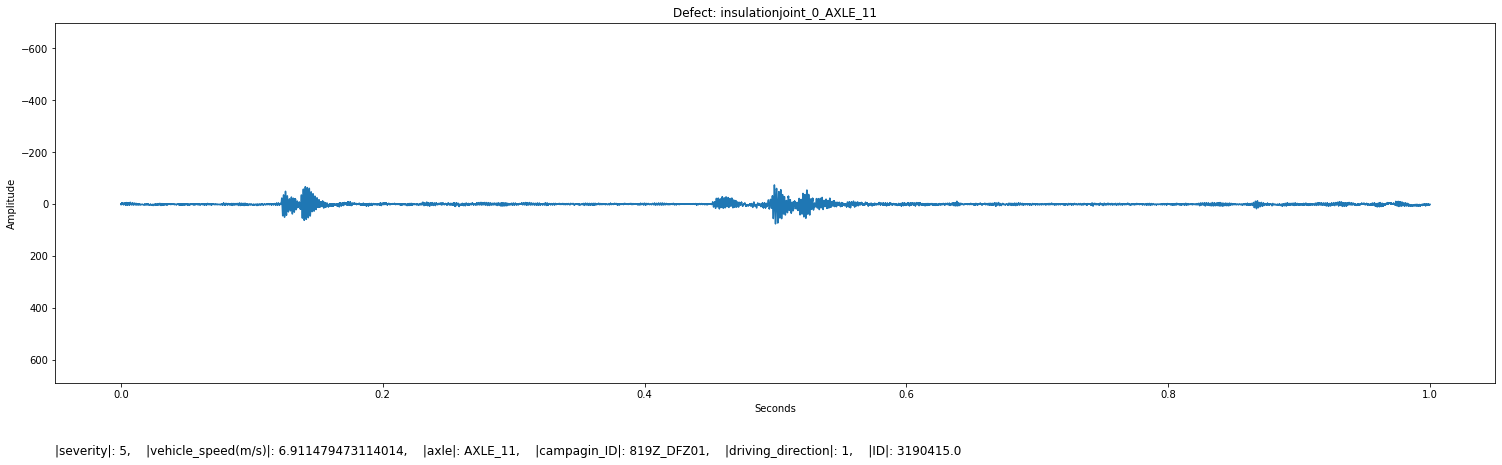

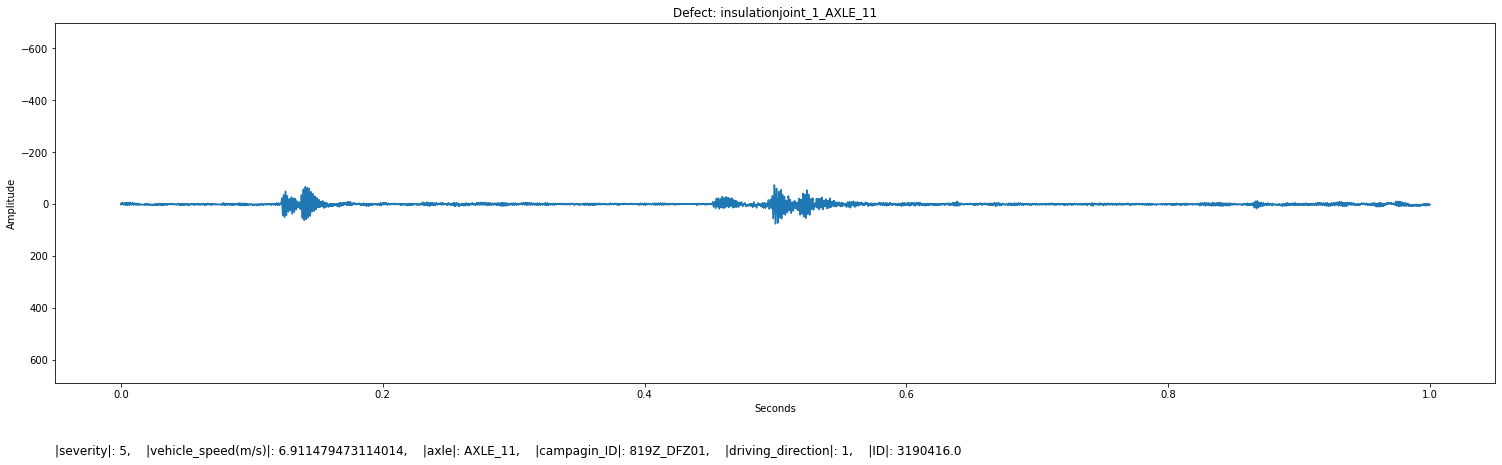

In [23]:
plot_entity(s_features.ins_joints, entity= 'defect')

In [26]:
s_features.defects[s_features.defects['axle'] == 'AXLE_11']
s_features.defects[s_features.defects['axle'] == 'AXLE_12']
s_features.defects[s_features.defects['axle'] == 'AXLE_41']
s_features.defects[s_features.defects['axle'] == 'AXLE_42']

,timestamps,accelerations,window_length(s),severity,vehicle_speed(m/s),axle,campagin_ID,driving_direction,defect_type,defect_length(m),"line, defect_ID",class_label
Vignolschiene_0_AXLE_42,"[1558941668065249792, 1558941668065291520, 155...","[3.55008369, 4.204046475, 4.640021665, 5.01371...",0.999959,3,10.550213,AXLE_42,819Z_DFZ01,1,Vignolschiene,0.000000,"(220, A-149704)",18
Vignolschiene_1_AXLE_42,"[1558941670721750016, 1558941670721791744, 155...","[2.397863545, 0.87195038, 0.591680615, -0.9653...",0.999958,3,10.860941,AXLE_42,819Z_DFZ01,1,Vignolschiene,0.000000,"(220, A-179597)",18
Stockschiene_0_AXLE_42,"[1558941677093583360, 1558941677093625088, 155...","[-7.909835589999999, -8.221246439999998, -7.75...",0.999958,4,10.750952,AXLE_42,819Z_DFZ01,1,Stockschiene,0.000000,"(450, A-188040)",17
Zungenschiene_0_AXLE_42,"[1558941687531708160, 1558941687531749888, 155...","[2.584710055, 1.089937975, 4.54659841, 2.05531...",0.999959,2,10.308920,AXLE_42,819Z_DFZ01,1,Zungenschiene,0.000000,"(450, A-216895)",20
Herzstückspitze_0_AXLE_42,"[1558941897633458432, 1558941897633500160, 155...","[51.289366995, 54.43461658, 50.604263124999996...",0.999958,2,27.651224,AXLE_42,819Z_DFZ01,1,Herzstückspitze,75.787183,"(450, A-222163)",10
...,...,...,...,...,...,...,...,...,...,...,...,...
Schweissverbindung_0_AXLE_42,"[1558942699977833216, 1558942699977874944, 155...","[-30.487122215, -29.490607495, -36.964467895, ...",0.999958,-1,44.597393,AXLE_42,819Z_DFZ01,1,Schweissverbindung,0.000000,"(400, A-228571)",15
Schotter_13_AXLE_42,"[1558942513962125056, 1558942513962166528, 155...","[7.16244955, 18.93377968, -11.895894469999998,...",0.999958,2,38.729076,AXLE_42,819Z_DFZ01,1,Schotter,0.000000,"(400, A-219762)",14
Weiche_1_AXLE_42,"[1558942100039124992, 1558942100039166720, 155...","[-29.303760984999997, -36.37278728, -46.244511...",0.999958,2,41.671242,AXLE_42,819Z_DFZ01,1,Weiche,28.006744,"(400, A-202102)",19
Schotter_14_AXLE_42,"[1558942089148291584, 1558942089148333312, 155...","[-26.53220442, -27.466436969999997, -15.881953...",0.999959,2,42.557716,AXLE_42,819Z_DFZ01,1,Schotter,0.000000,"(400, A-195523)",14


In [27]:
np.unique(s_features.defects['defect_type'])

array(['Bankett', 'Befestigung', 'Dienstweg', 'Entwässerungsgraben',
       'Fahrbahn', 'Gleis', 'Gleisbettung', 'Herzstück',
       'Herzstückspitze', 'Kleber', 'Schiene', 'Schienenzwischenlage',
       'Schotter', 'Schweissverbindung', 'Schwelle', 'Stockschiene',
       'Vignolschiene', 'Weiche', 'Zungenschiene'], dtype=object)